In [1]:
import pandas as pd

data = pd.read_csv('../Data/Violent/rape_yearwise.csv')


In [2]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Year                       10 non-null     int64
 1   Rape_Cases_Reported        10 non-null     int64
 2   Victims_Above_50_Yrs       10 non-null     int64
 3   Victims_Between_10-14_Yrs  10 non-null     int64
 4   Victims_Between_14-18_Yrs  10 non-null     int64
 5   Victims_Between_18-30_Yrs  10 non-null     int64
 6   Victims_Between_30-50_Yrs  10 non-null     int64
 7   Victims_of_Rape_Total      10 non-null     int64
 8   Victims_Upto_10_Yrs        10 non-null     int64
dtypes: int64(9)
memory usage: 848.0 bytes
None
             Year  Rape_Cases_Reported  Victims_Above_50_Yrs  \
count    10.00000            10.000000             10.000000   
mean   2005.50000         38001.600000            196.000000   
std       3.02765          4780.928854             59.494164   
m

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [4]:
X = data_scaled[:, 1:]  # Assuming first column is 'Year'
y = data_scaled[:, 0]    # Target: Rape_Cases_Reported


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer


/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-31 17:29:05.617975: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-31 17:29:05.618011: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-31 17:29:05.618020: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-31 17:29:05.618353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-31 17:29:05.618375: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created T

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100


2024-10-31 17:29:24.073308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1322 - val_loss: 0.0453
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1011 - val_loss: 0.0274
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0742 - val_loss: 0.0143
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0524 - val_loss: 0.0060
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0352 - val_loss: 0.0024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0225 - val_loss: 0.0031
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0143 - val_loss: 0.0076
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0098 - val_loss: 0.0148
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0086 - val_loss: 0.0235
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0097 - val_loss: 0.0324
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0118 - val_loss: 0.0401
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0140 - val_loss: 0.0457
Epo

In [10]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0172
Test Loss: 0.017166029661893845


In [14]:
future_predictions = model.predict(X_test)
future_predictions[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


0.81144935

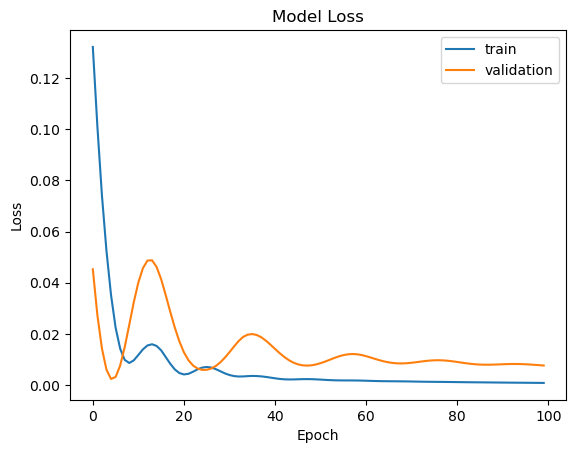

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
